## 1. Cuestiones sobre la DFT

**1. Con nuestras funciones podríamos ser al parecer capaces de multiplicar enteros con cualquier cantidad de dígitos. Esto nos lleva a la siguiente cuestión: ¿cuál es el tamaño máximo de un entero en Python 3.X? Para responderlo, investigar la implementación en Python 3.X de los enteros y describir brevemente los aspectos principales de la misma.**

No existe numero máximo para un entero de python 3.X. Esto se debe a la implementación de los ints en python. Esquematizando, la implementación se resume en una estructura que contiene el numero de objetos C que se necesitan para representar el número y el valor de dichos números. 

Pongamos un ejemplo: <br>
$123456789101112131415$ se representa con estos 3 bloques de números: <br>                                         $437976919 \ \ \ \ 87719511 \ \ \ \ 107$ cada uno de ellos en base 2^30 <br>
Por tanto $123456789101112131415$ es igual a : <br>
$(437976919 * 2^{30 * 0}) + (87719511 * 2^{30 * 1}) + (107 * 2^{30 * 2})$

<br>
Hemos encontrado en la <a href="https://rushter.com/blog/python-integer-implementation/">web</a> una traducción de código C a python de las funciones que transforman números a listas y viceversa:

In [1]:
SHIFT = 30  # number of bits for each 'digit'
MASK = (2 ** SHIFT)
bignum = 18446744073709551615

def split_number(bignum):
    t = abs(bignum)

    num_list = []
    while t != 0:
        # Get remainder from division
        small_int = t % MASK  # more efficient bitwise analogue: (t & (MASK-1))
        num_list.append(small_int)

        # Get integral part of the division (floor division)
        t = t // MASK  # more efficient bitwise analogue: t >>= SHIFT

    return num_list

def restore_number(num_list):
    bignum = 0
    for i, n in enumerate(num_list):
        bignum += n * (2 ** (SHIFT * i))
    return bignum

num_list = split_number(bignum)
assert bignum == restore_number(num_list)

**2. No nos hemos esforzado en optimizar el coste computacional de nuestra FFT. Un defecto mas o menos obvio es que muy probablemente calculemos repetidamente senos y cosenos en todas las llamadas recursivas mientras que en realidad bastaría hacerlo una vez en la primera ejecución recursiva. ¿Cómo implementarías esta posibilidad?**

Nuestra propuesta consiste en declarar una estructura global que sea un diccionario con clave igual al nodo donde calculamos los senos y cosenos y valor una tupla con el seno y coseno evaluado. Inicialmente la estructura estará vacía. La primera vez que intentemos acceder al diccionario, obtendremos la excepción KeyError que capturaremos y calcularemos los valores. Así las siguientes veces que se busque la clave en el diccionario, obtendremos los valores de seno y coseno ya calculados.

## 2. Cuestiones sobre QuickSelect

**1. Argumentar que MergeSort ordena una tabla de 5 elementos en a lo sumo 8 comparaciones de clave. **

Supongamos que tenemos la permutación [a,b,c,d,e]. Simulemos el algoritmo de mergeSort.
Dividimos la tabla: [a,b,c] [d,e].
Dividimos la primera de las tablas: [a,b] [c]
Al dividir la tabla [a,b] y hacer "merge" tenemos inevitablemente **1 cdc**.
Posteriormente toca mezclar las tablas [a,b] y [c] suponiendo que ambas están ordenadas. A lo sumo tendremos **2 cdc** puesto que si c es mayor que a tocará compararlo con b.b
Continuamos con la segunda mitad de la tabla con el "merge" de [d,e] de nuevo nos da **1 cdc**.
Por último se mezclan las tablas [a.b.c] y [d,e]. A partir de aquí tenemos varios casos:
1. Si d > c haremos solo **3 cdc** pues sabemos que e es mayor que d y por tanto no es necesario compararla con las demás.
2. Si b < d < c, tenemos **3 cdc** y habrá que comparar c con e para ver cuál de ellas es mayor, lo que nos añade **1 cdc**.
3. Si a < d < b, tenemos **2 cdc** hay que comparar e con b y c, que suma **2 cdc**
4. Por último si d < a tenemos **1 cdc** y queda comparar e con a, b y c, es decir **3 cdc**

Si sumamos todo, obtenemos un coste en el caso peor de **8 cdc**.




**En realidad, en qselect_5 solo queremos encontrar la mediana de una tabla de 5 elementos, pero no ordenarla. ¿Podríamos reducir así el número de comparaciones de clave necesarias? En función del correspondiente número mínimo de cdcs, ¿cuál sería el caso peor WQSelect(N) en comparaciones de clave? **

El número de comparaciones de clave podría reducirse a 7. El desarrollo del apartado anterior se mantiene igual hasta llegar al punto de mezclar [a,b,c] y [d,e]

1. Si d > c haremos solo **3 cdc** y ya sabemos que la mediana es c, puesto que e > d.
2. Si b < d < c, tenemos **3 cdc** y sabemos que la mediana es d.
3. Si a < d < b, tenemos **2 cdc** y solo queda comparar e con b para ver cuál es la mediana (**1 cdc**).
4. Por último si d < a tenemos **1 cdc**. Comparamos e con a (**1 cdc**), si e < a la mediana es a ([d,e,a,...]), en caso contrario, comparamos e con b (**1 cdc**) si e < b la mediana es e ([d,a,e,...]), en caso contrario la mediana es b ([d,a,b,..]).

Para la segunda pregunta, solo tendríamos que sustituir el 8 por un 7 en el desarrollo que hicimos en clase. Obtenemos así un coste en el caso peor $\leq 25.8N$


**2. ¿Que tipo de crecimiento cabría esperar en el caso peor para los tiempos de ejecución de nuestra función qsort_5? Intenta justificar experimental y analíticamente tu respuesta. **

El coste debería ser O(NlogN). Para ello medimos los tiempos del caso peor, es decir, la tabla totalmente ordenada, con qsort_5 para permutaciones entre tamaños de 10 y 100 con paso 10. Posteriormente pintamos sobre la misma gráfica la función NlogN, reescalando los valores obtenidos para poder compararlo.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from qselect02 import qsort_5
ini = 10
fin = 1000
step = 10
num_perm = 10
t = []
for tam in range(ini, fin+1, step):
    t_aux = []
    for _ in range(num_perm):
        l = list(range(tam)) # Caso peor de QS
        i = time()
        qsort_5(l, 0, tam-1)
        f = time()
        t_aux.append(f-i)
    t.append(np.mean(t_aux))


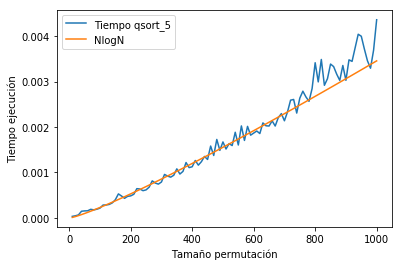

In [4]:
plt.plot(range(ini, fin+1, step), t, label="Tiempo qsort_5")

def f(ini, fin, step):
    X = []
    for N in range(ini, fin+1, step):
        X.append(N*np.log(N)/2e6)
    return X

X = f(ini, fin, step)
plt.plot(range(ini, fin+1, step), X, label="NlogN")
plt.legend()
plt.xlabel("Tamaño permutación")
plt.ylabel("Tiempo ejecución")
plt.show()

Se observa claramente que la función qsort_5 se ajusta bastante bien con NlogN